In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import category_encoders as ce

In [12]:
# imports the csv from my github as a dataframe

df0 = pd.read_csv('https://raw.githubusercontent.com/SeanAntosiak/LS-DS6-Unit-2-Project/master/SDSSdataset.csv')

In [14]:
# looks at dataframe

df0.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237663228535374206,300.841762,76.511282,19.19619,17.83329,17.52225,17.40237,17.35182,4134,301,1,106,1869067566828251136,STAR,-0.000220,1660,53230,268
1,1237663228535374382,300.730508,76.551731,21.65541,19.13715,17.92577,17.44741,17.15818,4134,301,1,106,1869069216095692800,STAR,-0.000008,1660,53230,274
2,1237663228535374435,300.871382,76.530570,20.70867,19.20954,18.55966,18.24395,18.10117,4134,301,1,106,1869067291950344192,STAR,0.000096,1660,53230,267
3,1237663228535374802,300.317409,76.374746,22.88806,21.20900,19.90560,19.33555,19.08966,4134,301,1,106,1870200338850539520,STAR,-0.000247,1661,53240,293
4,1237663228535439577,301.252332,76.319520,17.82932,16.11081,15.39808,15.13612,15.00507,4134,301,1,107,1869072789508483072,STAR,-0.000131,1660,53230,287


In [15]:
# looks at columns

df0.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [18]:
# redshift values for QSO are much higher but intensity is similar
# I will create features that tries to account for this

cols = ['u','g','r','i','z']

df1 = df0.copy()

for col in cols:
    df1[f'{col}RS']=(df1[col]*(df1['redshift']));

In [19]:
# checking to make sure features were added correctly

df1.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,class,redshift,plate,mjd,fiberid,uRS,gRS,rRS,iRS,zRS
0,1237663228535374206,300.841762,76.511282,19.19619,17.83329,17.52225,17.40237,17.35182,4134,301,...,STAR,-0.000220,1660,53230,268,-0.004214,-0.003915,-0.003846,-0.003820,-0.003809
1,1237663228535374382,300.730508,76.551731,21.65541,19.13715,17.92577,17.44741,17.15818,4134,301,...,STAR,-0.000008,1660,53230,274,-0.000181,-0.000160,-0.000150,-0.000146,-0.000143
2,1237663228535374435,300.871382,76.530570,20.70867,19.20954,18.55966,18.24395,18.10117,4134,301,...,STAR,0.000096,1660,53230,267,0.001987,0.001843,0.001780,0.001750,0.001736
3,1237663228535374802,300.317409,76.374746,22.88806,21.20900,19.90560,19.33555,19.08966,4134,301,...,STAR,-0.000247,1661,53240,293,-0.005659,-0.005244,-0.004922,-0.004781,-0.004720
4,1237663228535439577,301.252332,76.319520,17.82932,16.11081,15.39808,15.13612,15.00507,4134,301,...,STAR,-0.000131,1660,53230,287,-0.002344,-0.002119,-0.002025,-0.001990,-0.001973


In [20]:
# sets initinal X features and y lables 
# using intensity(brightness) and redshift(distance) colums as features

X0 = df1[['u', 'g', 'r', 'i', 'z','uRS', 'gRS', 'rRS', 'iRS', 'zRS', 'redshift']]

y0 = df1['class']

In [21]:
# creating a train test split, and then again for a train validation split

X0train, X0test, y0train, y0test = tts(X0,y0, train_size=0.90, test_size=0.10, random_state=8)

X1train, X1val, y1train, y0val = tts(X0train,y0train, train_size=0.90, test_size=0.10, random_state=8)

In [22]:
# finding a baseline for majority class

y0.value_counts(normalize=True)

# predicting galaxy every time would result in an accuracy of almost 50%

GALAXY    0.618553
STAR      0.226011
QSO       0.155436
Name: class, dtype: float64

In [23]:
# settings a logistic regression model and scores it on test set

mod0 = LogReg(solver='lbfgs', multi_class='auto', max_iter=1000) # keywords set to silence warnings
mod0.fit(X1train,y1train)
mod0.score(X1val, y0val)

/opt/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9764572838490799

In [ ]:
# tries a basic RandomForestClassifier and scores it

mod1 = RandomForestClassifier(max_depth=20, n_estimators=1000, n_jobs=-1) # keywords set to silence warnings
mod1.fit(X1train,y1train)
mod1.score(X1val, y0val)

In [25]:
# checks importance values

importance = mod1.feature_importances_
pd.Series(importance, X1val.columns)

u           0.004696
g           0.003015
r           0.004510
i           0.008484
z           0.009167
uRS         0.138317
gRS         0.155127
rRS         0.172246
iRS         0.159121
zRS         0.115394
redshift    0.229923
dtype: float64

In [40]:
# creating dataframes that seperate out each class for graphing purposes
Star = df1[df1['class']=='STAR']
Galaxy = df1[df1['class']=='GALAXY']
QSO = df1[df1['class']=='QSO']

In [ ]:
# ploting ultraviolet intensity against redshift

plt.style.use('dark_background')

fig = plt.figure()
ax = plt.axes()

plt.xlabel('Redshift')
plt.ylabel('U Band Intesnsity')

ax.scatter(Star['redshift'], Star['u'],color='yellow', label='Star')
ax.scatter(Galaxy['redshift'], Galaxy['u'],color='red', label='Galaxy')
ax.scatter(QSO['redshift'], QSO['u'], color='blue', label='QSO')

ax.legend()

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

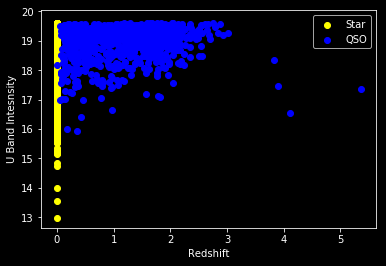

In [52]:
# ploting just QSO and stars

plt.style.use('dark_background')

fig = plt.figure()
ax = plt.axes()

plt.xlabel('Redshift')
plt.ylabel('U Band Intesnsity')

ax.scatter(Star['redshift'], Star['u'],color='yellow', label='Star')
ax.scatter(QSO['redshift'], QSO['u'], color='blue', label='QSO')

ax.legend()

plt.show

In [ ]:
# ploting just stars and regular galaxies

plt.style.use('dark_background')

fig = plt.figure()
ax = plt.axes()

plt.xlabel('Redshift')
plt.ylabel('U Band Intesnsity')

ax.scatter(Star['redshift'], Star['u'],color='yellow', label='Star')
ax.scatter(Galaxy['redshift'], Galaxy['u'],color='red', label='Galaxy')

ax.legend()

plt.show